In [ ]:

import keras
import cv2
import os
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
from keras import backend
from sklearn.model_selection import train_test_split

In [ ]:
!unzip '/content/DigitDataset.zip'

Streaming output truncated to the last 5000 lines.
 extracting: DigitDataset/5/image4001.png  
 extracting: DigitDataset/5/image4002.png  
 extracting: DigitDataset/5/image4003.png  
 extracting: DigitDataset/5/image4004.png  
 extracting: DigitDataset/5/image4005.png  
  inflating: DigitDataset/5/image4006.png  
 extracting: DigitDataset/5/image4007.png  
 extracting: DigitDataset/5/image4008.png  
 extracting: DigitDataset/5/image4009.png  
 extracting: DigitDataset/5/image4010.png  
 extracting: DigitDataset/5/image4011.png  
 extracting: DigitDataset/5/image4012.png  
 extracting: DigitDataset/5/image4013.png  
 extracting: DigitDataset/5/image4014.png  
 extracting: DigitDataset/5/image4015.png  
 extracting: DigitDataset/5/image4016.png  
 extracting: DigitDataset/5/image4017.png  
 extracting: DigitDataset/5/image4018.png  
 extracting: DigitDataset/5/image4019.png  
 extracting: DigitDataset/5/image4020.png  
 extracting: DigitDataset/5/image4021.png  
 extracting: DigitDataset

In [ ]:
link = '/content/DigitDataset'
def loading_image(link):
  image_dataset=[]
  image_label = []
  image_path = list(paths.list_images(link))
  for image_path in image_path:
    image = cv2.imread(image_path , cv2.IMREAD_UNCHANGED)
    label = int(image_path.split(os.path.sep)[-2])
    image = image.astype('float32')
    image_dataset.append(image)
    image_label.append(label)
  image_dataset_array = np.asarray(image_dataset)
  image_label_array = np.asarray(image_label)
  return image_dataset_array , image_label_array

In [ ]:
x , l =loading_image(link)
print(x.shape)
print(l.shape)

(10000, 28, 28)
(10000,)


In [ ]:
#channel first and channel last
if keras.backend.image_data_format() == 'channels_first':
  x = x.reshape(x.shape[0] , 1 , x.shape[1] , x.shape[2])
  input_shape = (1 , x.shape[1] , x.shape[2])
else:
  x = x.reshape(x.shape[0] , x.shape[1] , x.shape[2] , 1)
  input_shape = (x.shape[1] , x.shape[2] , 1)

In [ ]:
print(input_shape)

(28, 28, 1)


In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x , l , test_size=0.2 , random_state=42)

In [ ]:
# to categorical
ytrain = keras.utils.to_categorical(ytrain , num_classes=10)
ytest = keras.utils.to_categorical(ytest , num_classes=10)

In [ ]:
# normalization
xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.min())
print(xtrain.max())

0.0
1.0


In [ ]:
from keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Flatten
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=input_shape))
model.add(Conv2D(64 , kernel_size=(3,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
output_fit = model.fit(xtrain , ytrain , epochs=10 , batch_size=128)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 349ms/step - accuracy: 0.3740 - loss: 1.7903
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 337ms/step - accuracy: 0.7979 - loss: 0.6028
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.9097 - loss: 0.2669
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 350ms/step - accuracy: 0.9456 - loss: 0.1707
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.9653 - loss: 0.1068
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 352ms/step - accuracy: 0.9744 - loss: 0.0810
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 333ms/step - accuracy: 0.9781 - loss: 0.0720
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 315ms/step - accuracy: 0.9796 - loss: 0.0648
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.9788 - loss: 0.0607
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.9861 - loss: 0.0474


In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss'])


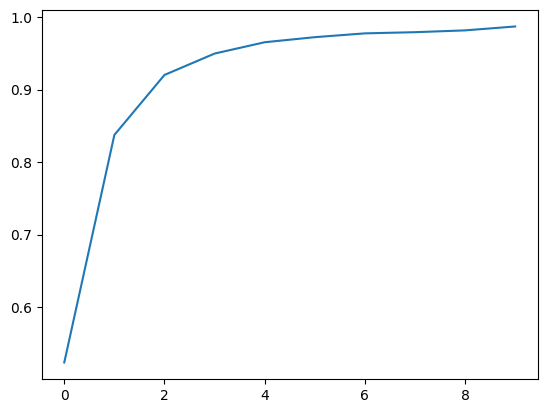

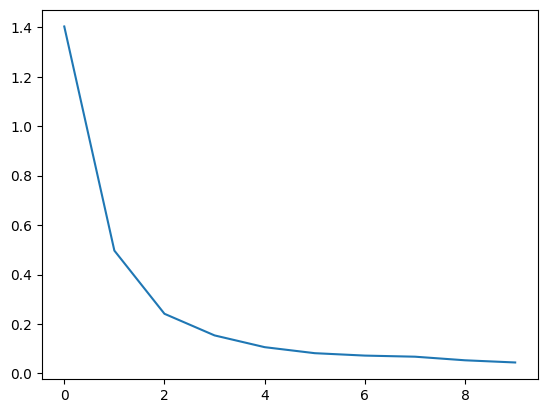

In [ ]:
plt.plot(output_fit.history['accuracy'])
plt.show()
plt.plot(output_fit.history['loss'])
plt.show()

In [ ]:
output_predict= model.predict(xtest, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


In [ ]:
print(output_predict)

[[1.8578123e-09 2.1713221e-10 1.7575267e-12 ... 7.2525227e-13
  2.7500766e-07 1.7648333e-08]
 [2.2704988e-05 8.0379723e-05 2.3927413e-04 ... 3.0713915e-04
  9.9899197e-01 3.5540239e-07]
 [9.6654320e-09 5.8207101e-09 9.9999994e-01 ... 1.3672285e-12
  2.3948826e-20 4.3758603e-18]
 ...
 [6.2885000e-14 2.3655604e-08 1.0857730e-08 ... 9.9999994e-01
  3.1404928e-09 3.0299832e-14]
 [1.3956016e-10 4.7230860e-05 9.9995273e-01 ... 9.9887165e-09
  4.8894298e-13 5.5598538e-13]
 [3.9163672e-12 1.6500067e-11 1.7709282e-11 ... 3.2651464e-12
  4.8735643e-07 9.3921679e-09]]


In [ ]:
predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(ytrain[0:20])
print(predicted_classes[0:20])

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[5 8 2 8 8 5 4 9 5 4 0 7 9 9 3 5 4 1 7 6]


In [ ]:
output_evaluate = model.evaluate(xtest , ytest , batch_size=128)
print(output_evaluate)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9986 - loss: 0.0058
[0.00490983109921217, 0.9990000128746033]
